In [5]:
from datasets import load_dataset

case_hold = load_dataset("lex_glue", "case_hold")
print(case_hold["train"][1])  # View first sample

c:\Users\manan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\manan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


{'context': 'Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a secret scientific, technical, merchandising, production or management information, design, process, procedure, formula, invention or improvement”); Warner-Lambert Co., 427 Mass. at 49 (“ [Confidential and proprietary business information may be entitled to protection, even if such information cannot claim trade secret protection”); see, e.g., Augat, Inc., 409 Mass. at 173 (<HOLDING>). “Matters of public knowledge or of general', 'endings': ['recognizing that even if a plaintiff claims certain information constitutes trade secrets its claim may not depend on t

In [6]:
# Get dataset statistics and structure
print("Dataset structure:", case_hold)
print("\nAvailable splits:", case_hold.keys())

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3600
    })
    validation: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3900
    })
})

Available splits: dict_keys(['train', 'test', 'validation'])


In [ ]:
# import os
# import pandas as pd

# # Define your custom path
# output_dir = "C:/Users/Manan/Desktop/case_hold_csv"

# # Create directory if it doesn't exist
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
#     print(f"Created directory: {output_dir}")

# # Save each split as CSV
# for split in case_hold.keys():
#     df = pd.DataFrame(case_hold[split])
#     csv_path = os.path.join(output_dir, f"case_hold_{split}.csv")
#     df.to_csv(csv_path, index=False)


In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
# Get sample text from the dataset
sample_text = case_hold["train"][0]["context"]
print("Original text sample:")
print(sample_text[:500] + "...\n")  # Show first 500 chars

Original text sample:
Drapeau’s cohorts, the cohort would be a “victim” of making the bomb. Further, firebombs are inherently dangerous. There is no peaceful purpose for making a bomb. Felony offenses that involve explosives qualify as “violent crimes” for purposes of enhancing the sentences of career offenders. See 18 U.S.C. § 924(e)(2)(B)(ii) (defining a “violent felony” as: “any crime punishable by imprisonment for a term exceeding one year ... that ... involves use of explosives”). Courts have found possession of...



## Basic Pre Processing 

In [9]:
# 1. Tokenization - Sentence Level
sentences = sent_tokenize(sample_text)
print(f"Sentence Tokenization (first 3 of {len(sentences)} sentences):")
for i, sentence in enumerate(sentences[:3]):
    print(f"Sentence {i+1}: {sentence}")
print()

# 2. Tokenization - Word Level
words = word_tokenize(sample_text)
print(f"Word Tokenization (first 20 of {len(words)} words):")
print(words[:20])
print()

Sentence Tokenization (first 3 of 9 sentences):
Sentence 1: Drapeau’s cohorts, the cohort would be a “victim” of making the bomb.
Sentence 2: Further, firebombs are inherently dangerous.
Sentence 3: There is no peaceful purpose for making a bomb.

Word Tokenization (first 20 of 189 words):
['Drapeau', '’', 's', 'cohorts', ',', 'the', 'cohort', 'would', 'be', 'a', '“', 'victim', '”', 'of', 'making', 'the', 'bomb', '.', 'Further', ',']



In [10]:
# 3. Converting to lowercase
words_lower = [word.lower() for word in words]
print("After converting to lowercase (first 20):")
print(words_lower[:20])
print()

After converting to lowercase (first 20):
['drapeau', '’', 's', 'cohorts', ',', 'the', 'cohort', 'would', 'be', 'a', '“', 'victim', '”', 'of', 'making', 'the', 'bomb', '.', 'further', ',']



In [11]:
# 4. Stopword Removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_lower if word.isalnum() and word not in stop_words]
print(f"After stopword removal (first 20 of {len(filtered_words)} words):")
print(filtered_words[:20])
print()

After stopword removal (first 20 of 80 words):
['drapeau', 'cohorts', 'cohort', 'would', 'victim', 'making', 'bomb', 'firebombs', 'inherently', 'dangerous', 'peaceful', 'purpose', 'making', 'bomb', 'felony', 'offenses', 'involve', 'explosives', 'qualify', 'violent']



In [12]:
# 5. Frequency Distribution and Word Count
word_freq = Counter(filtered_words)
print(f"Total unique words after preprocessing: {len(word_freq)}")
print("\nMost common 15 words:")
for word, count in word_freq.most_common(15):
    print(f"{word}: {count}")

Total unique words after preprocessing: 67

Most common 15 words:
bomb: 4
would: 2
making: 2
purpose: 2
felony: 2
explosives: 2
violent: 2
see: 2
crime: 2
united: 2
states: 2
drapeau: 1
cohorts: 1
cohort: 1
victim: 1


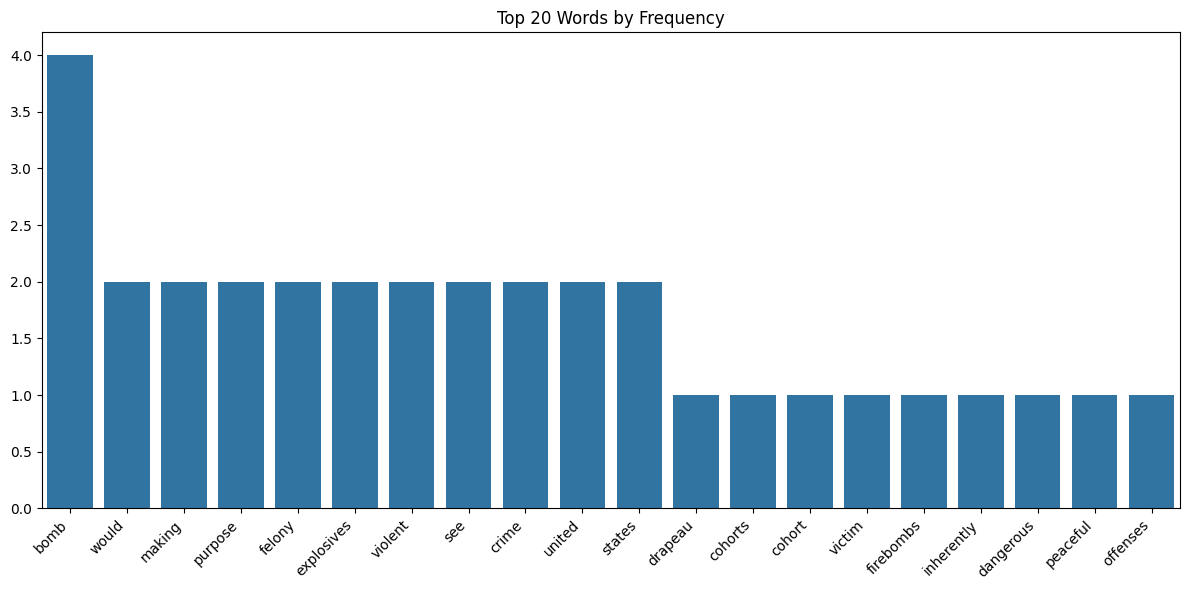

In [13]:
# 6. Visualize frequency distribution
plt.figure(figsize=(12, 6))
top_words = dict(word_freq.most_common(20))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Word frequency dataframe (top 10 rows):
         Word  Frequency
0        bomb          4
1       would          2
2      making          2
3     purpose          2
4      felony          2
5  explosives          2
6     violent          2
7         see          2
8       crime          2
9      united          2


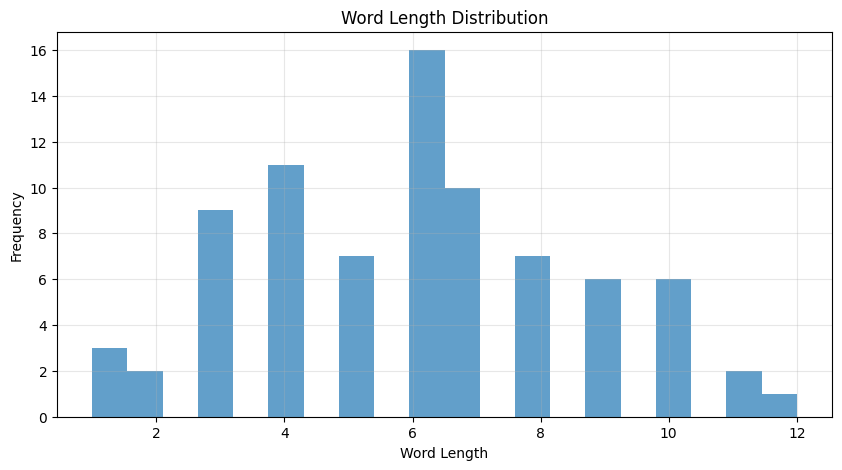


Average word length after preprocessing: 6.04 characters


In [14]:
# 7. Create a DataFrame for better analysis
word_freq_df = pd.DataFrame(word_freq.most_common(), columns=['Word', 'Frequency'])
print("\nWord frequency dataframe (top 10 rows):")
print(word_freq_df.head(10))

# 8. Word length distribution
word_lengths = [len(word) for word in filtered_words]
plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=20, alpha=0.7)
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAverage word length after preprocessing: {sum(word_lengths)/len(word_lengths):.2f} characters")

## Applying NER 
##### For Entity Extraction

In [ ]:
# %pip install spacy
# !python -m spacy download en_core_web_lg

Note: you may need to restart the kernel to use updated packages.


     -------------------------------------- 587.7/587.7 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')



     -------------------------------------- 587.7/587.7 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [15]:
import spacy
import spacy.cli
from spacy import displacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the large English model with good NER capabilities
nlp = spacy.load('en_core_web_lg')

# Function to extract entities from text
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


In [64]:
# Apply NER on a sample text from the dataset
sample_text = case_hold["train"][1]["context"]
entities = extract_entities(sample_text)

# Display the first 20 entities found
print("Sample of entities extracted:")
for entity, label in entities[:15]:
    print(f"{entity} -> {label}")

# Count entities by type
entity_counts = Counter([label for _, label in entities])
print("\nEntity type distribution:")
for label, count in entity_counts.most_common():
    print(f"{label}: {count}")

Sample of entities extracted:
Colameta -> ORG
Colameta -> ORG
at least two -> CARDINAL
G.L.c -> ORG
266 -> CARDINAL
G.L.c -> ORG
93 -> CARDINAL
42 -> CARDINAL
Warner-Lambert Co. -> ORG
427 -> CARDINAL
Mass. -> GPE
49 -> DATE
Augat, Inc. -> ORG
409 -> CARDINAL
Mass. -> GPE

Entity type distribution:
CARDINAL: 7
ORG: 6
GPE: 2
DATE: 1


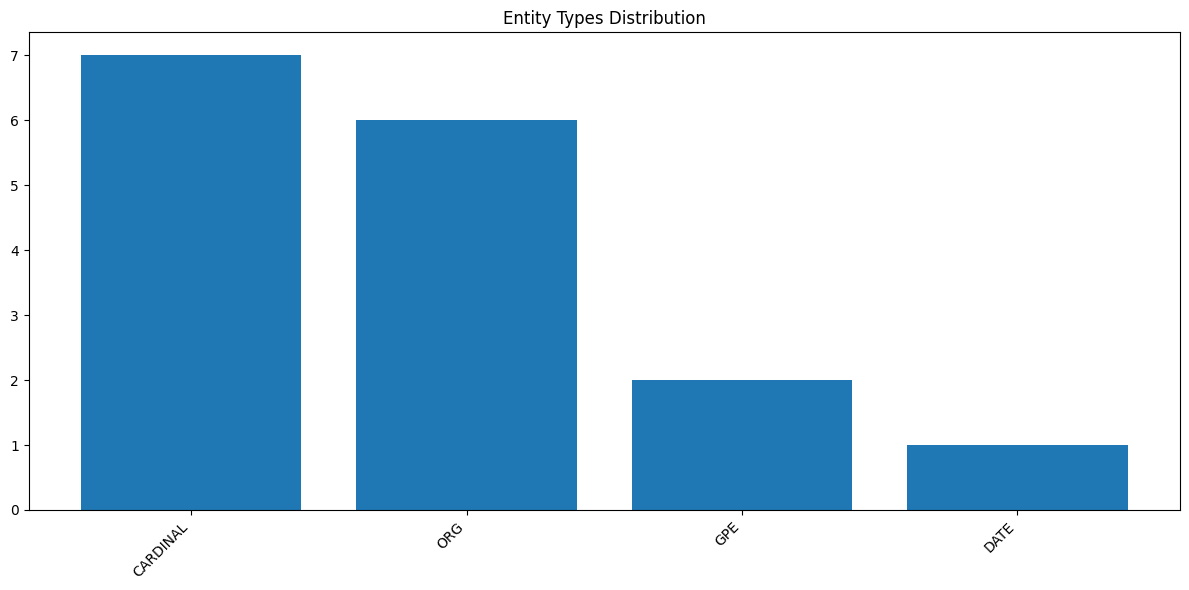

In [65]:
# Visualize entity distribution
plt.figure(figsize=(12, 6))
labels, counts = zip(*entity_counts.most_common())
plt.bar(labels, counts)
plt.title('Entity Types Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [62]:
# Visualize entities in text (first 500 characters)
short_sample = sample_text[:500]
doc = nlp(short_sample)
displacy.render(doc, style="ent", jupyter=True)

# Extract specific entity types of interest
legal_entities = {
    "PERSON": [],     # People names
    "ORG": [],        # Organizations 
    "DATE": [],       # Dates
    "MONEY": [],      # Monetary values
    "LAW": [],        # Laws (may be captured as ORG in some models)
    "GPE": [],        # Geopolitical entities (countries, cities)
    "NORP": []        # Nationalities, religious or political groups
}

In [61]:
# Populate the entity lists
for entity, label in entities:
    if label in legal_entities:
        legal_entities[label].append(entity)

# Display most common entities by type
print("\n--- Most common entities by type ---")
for entity_type, entities_list in legal_entities.items():
    if entities_list:
        entity_counter = Counter(entities_list)
        print(f"\n{entity_type}:")
        for entity, count in entity_counter.most_common(7):
            print(f"  • {entity}: {count}")



--- Most common entities by type ---

ORG:
  • Colameta: 2
  • G.L.c: 2
  • Warner-Lambert Co.: 1
  • Augat, Inc.: 1

DATE:
  • 49: 1

GPE:
  • Mass.: 2


In [63]:
# Create a dataframe with all entities for easier analysis
entity_df = pd.DataFrame(entities, columns=['Entity', 'Type'])
print("\nEntity DataFrame Preview:")
print(entity_df.head(20))


Entity DataFrame Preview:
                Entity      Type
0             Colameta       ORG
1             Colameta       ORG
2         at least two  CARDINAL
3                G.L.c       ORG
4                  266  CARDINAL
5                G.L.c       ORG
6                   93  CARDINAL
7                   42  CARDINAL
8   Warner-Lambert Co.       ORG
9                  427  CARDINAL
10               Mass.       GPE
11                  49      DATE
12         Augat, Inc.       ORG
13                 409  CARDINAL
14               Mass.       GPE
15                 173  CARDINAL


In [67]:
# Save entities to CSV
entity_df.to_csv('legal_entities.csv', index=False)
print("\nEntities saved to legal_entities.csv")


Entities saved to legal_entities.csv


## TF-IDF and GloVE Implementation